In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import pandas as pd
ln=pd.read_csv("train.csv")
ln

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [ ]:
ln.info

<bound method DataFrame.info of                                                     sms  label
0     Go until jurong point, crazy.. Available only ...      0
1                       Ok lar... Joking wif u oni...\n      0
2     Free entry in 2 a wkly comp to win FA Cup fina...      1
3     U dun say so early hor... U c already then say...      0
4     Nah I don't think he goes to usf, he lives aro...      0
...                                                 ...    ...
5569  This is the 2nd time we have tried 2 contact u...      1
5570             Will ü b going to esplanade fr home?\n      0
5571  Pity, * was in mood for that. So...any other s...      0
5572  The guy did some bitching but I acted like i'd...      0
5573                       Rofl. Its true to its name\n      0

[5574 rows x 2 columns]>

In [ ]:
ln.shape

(5574, 2)

In [ ]:
ln['label'].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

<Axes: title={'center': 'count of labels'}, xlabel='label'>

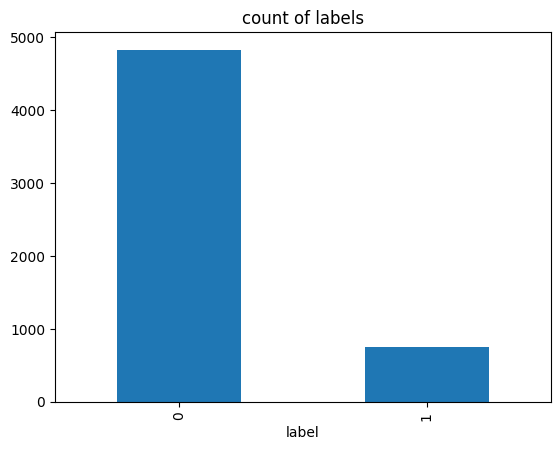

In [ ]:
ln['label'].value_counts().plot(kind='bar',title='count of labels')

<Axes: title={'center': 'count of labels'}, ylabel='count'>

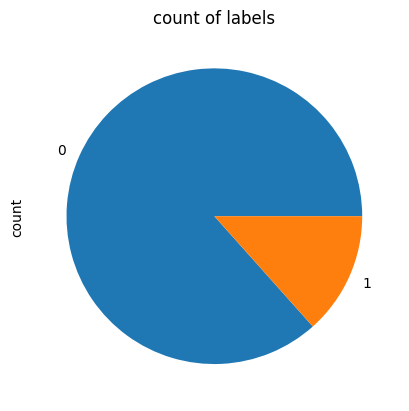

In [ ]:
ln['label'].value_counts().plot(kind='pie',title='count of labels')

<Axes: xlabel='label', ylabel='Count'>

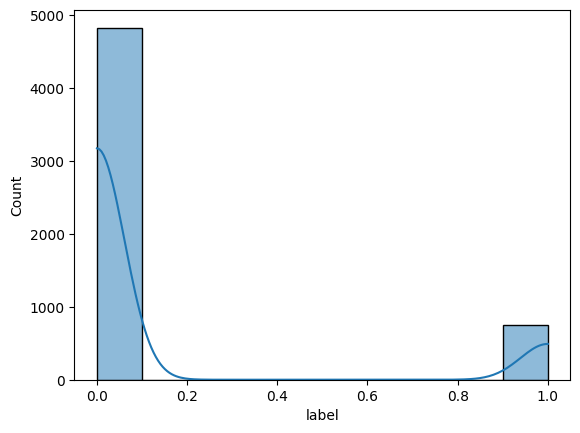

In [ ]:
sns.histplot(ln['label'],kde=True,bins=10)

In [ ]:
x=np.array(ln['sms'])
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
       'Ok lar... Joking wif u oni...\n',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
       ..., 'Pity, * was in mood for that. So...any other suggestions?\n',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n",
       'Rofl. Its true to its name\n'], dtype=object)

In [ ]:
y=np.array(ln["label"])
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
cv=CountVectorizer(min_df=1,stop_words='english',lowercase=True)
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
print(X)

  (0, 4248)	1
  (0, 5779)	1
  (0, 2282)	1
  (0, 1284)	1
  (0, 1719)	1
  (0, 3555)	1
  (0, 8285)	1
  (0, 4374)	1
  (0, 1717)	1
  (0, 2007)	1
  (0, 3515)	1
  (0, 1064)	1
  (0, 8083)	1
  (1, 5377)	1
  (1, 4410)	1
  (1, 4216)	1
  (1, 8191)	1
  (1, 5403)	1
  (2, 3280)	1
  (2, 2889)	2
  (2, 8243)	1
  (2, 2123)	1
  (2, 8203)	1
  (2, 3018)	2
  (2, 2341)	1
  :	:
  (5569, 2781)	1
  (5569, 309)	1
  (5569, 710)	1
  (5569, 5840)	1
  (5569, 165)	1
  (5569, 5297)	1
  (5570, 3813)	1
  (5570, 3484)	1
  (5570, 3267)	1
  (5570, 2921)	1
  (5571, 5022)	1
  (5571, 5711)	1
  (5571, 7217)	1
  (5572, 3280)	1
  (5572, 8129)	1
  (5572, 4512)	1
  (5572, 2546)	1
  (5572, 3392)	1
  (5572, 1753)	1
  (5572, 3609)	1
  (5572, 4067)	1
  (5572, 911)	1
  (5572, 1515)	1
  (5573, 7709)	1
  (5573, 6366)	1


In [ ]:
print(X_train.shape)
print(X_test.shape)

(4180, 8444)
(1394, 8444)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(4180,)
(1394,)


In [ ]:
sample=input("enter the message")
data=cv.transform([sample]).toarray()
print(clf.predict(data))
if clf.predict(data)==1:
    print("ham")
else:
    print("spam")


enter the messagejaghjdghb...
[0]
spam


In [ ]:
sample=input("enter the message")
data=cv.transform([sample]).toarray()
print(clf.predict(data))
if clf.predict(data)==1:
    print("ham")
else:
    print("spam")


enter the messagerun away
[0]
spam


In [ ]:
sample=input("enter the message")
data=cv.transform([sample]).toarray()
print(clf.predict(data))
if clf.predict(data)==1:
    print("ham")
else:
    print("spam")


enter the messagegoing tonight
[0]
spam


In [ ]:
sample=input("enter the message")
data=cv.transform([sample]).toarray()
print(clf.predict(data))
if clf.predict(data)==1:
    print("ham")
else:
    print("spam")


enter the messagethis is the 2nd Time we are trying to contact you
[1]
ham


In [ ]:
clf.score(X_test,y_test)

0.9770444763271162